In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\adrik\Documents\Cleaned_Dataset\cleaned_dataset.csv")

In [3]:
df.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,...,0,N,0,2,0,0,0,32,1,IND-BWI
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,...,0,N,0,10,0,0,0,47,1,IND-LAS
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,...,0,N,0,8,0,0,0,72,1,IND-MCO
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,...,0,N,0,3,0,0,0,12,1,IND-PHX
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,...,0,N,0,0,0,0,0,16,1,IND-TPA
5,Thursday,2019-01-03,14:16,15:12,14:35,WN,Southwest Airlines Co.,54,N643SW,00:56,...,0,N,0,12,0,0,0,25,1,ISP-BWI
6,Thursday,2019-01-03,16:57,17:54,17:35,WN,Southwest Airlines Co.,623,N724SW,00:57,...,0,N,0,7,0,0,0,12,1,ISP-BWI
7,Thursday,2019-01-03,14:22,16:57,16:10,WN,Southwest Airlines Co.,188,N215WN,02:35,...,0,N,0,40,0,0,0,7,1,ISP-FLL
8,Thursday,2019-01-03,21:07,23:34,22:30,WN,Southwest Airlines Co.,362,N798SW,02:27,...,0,N,0,5,0,0,0,59,1,ISP-MCO
9,Thursday,2019-01-03,18:12,19:27,18:15,WN,Southwest Airlines Co.,422,N779SW,02:15,...,0,N,0,3,0,0,0,69,1,ISP-MDW


In [6]:
display(df[['Cancelled', 'CancellationCode']])

,Cancelled,CancellationCode
0,0,N
1,0,N
2,0,N
3,0,N
4,0,N
...,...,...
484544,0,N
484545,0,N
484546,0,N
484547,0,N


In [9]:
df['Cancelled'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])
display(df[['Cancelled', 'CancellationCode']])

,Cancelled,CancellationCode
0,1,N
1,0,N
2,0,N
3,0,N
4,0,N
...,...,...
484544,0,N
484545,0,N
484546,1,N
484547,0,N


In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [14]:
cancelled_count = df['Cancelled'].sum()
display(cancelled_count)

np.int64(145088)

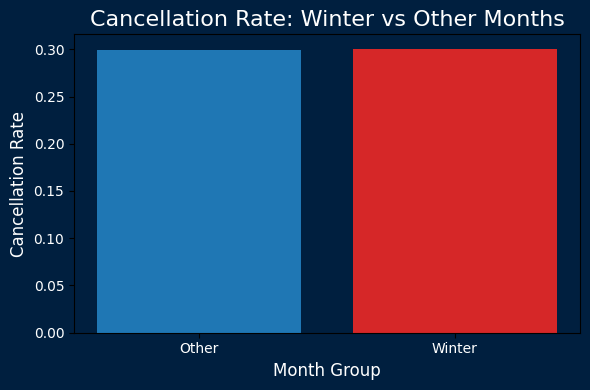

In [18]:
winter_months = [11, 12, 1]
df['Winter'] = df['Month'].apply(lambda x: 'Winter' if x in winter_months else 'Other')

cancel_rate = df.groupby('Winter')['Cancelled'].mean()

plt.figure(figsize=(6,4))
bars = plt.bar(cancel_rate.index, cancel_rate.values, color=['#1f77b4', '#d62728'])
plt.title('Cancellation Rate: Winter vs Other Months', fontsize=16, color='white')
plt.xlabel('Month Group', fontsize=12, color='white')
plt.ylabel('Cancellation Rate', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#001f3f')
plt.gcf().patch.set_facecolor('#001f3f')
plt.tight_layout()
display(plt.gcf())
plt.close()

In [19]:
print(df.columns)

Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Month', 'Route', 'Winter'],
      dtype='object')


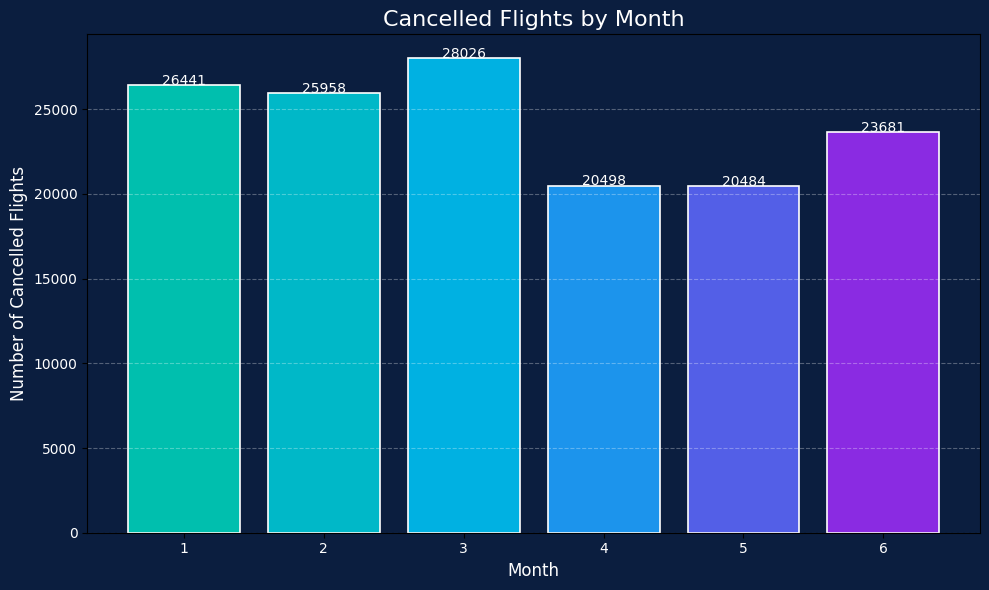

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Calculate cancelled flights per month
cancelled_by_month = df[df['Cancelled'] == 1].groupby('Month').size()


cmap = LinearSegmentedColormap.from_list("teal_purple_gradient", ["#00BFAE", "#00AEEF", "#8A2BE2"])


plt.figure(figsize=(10, 6))
bars = plt.bar(cancelled_by_month.index,
               cancelled_by_month.values,
               color=cmap(np.linspace(0, 1, len(cancelled_by_month))),
               edgecolor='white', linewidth=1.2)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 5,
             f"{int(height)}",
             ha='center', color='white', fontsize=10)


plt.title('Cancelled Flights by Month', fontsize=16, color='white')
plt.xlabel('Month', fontsize=12, color='white')
plt.ylabel('Number of Cancelled Flights', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#0B1E3F')   # dark navy-blue background
plt.gcf().patch.set_facecolor('#0B1E3F')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')

plt.tight_layout()
plt.show()


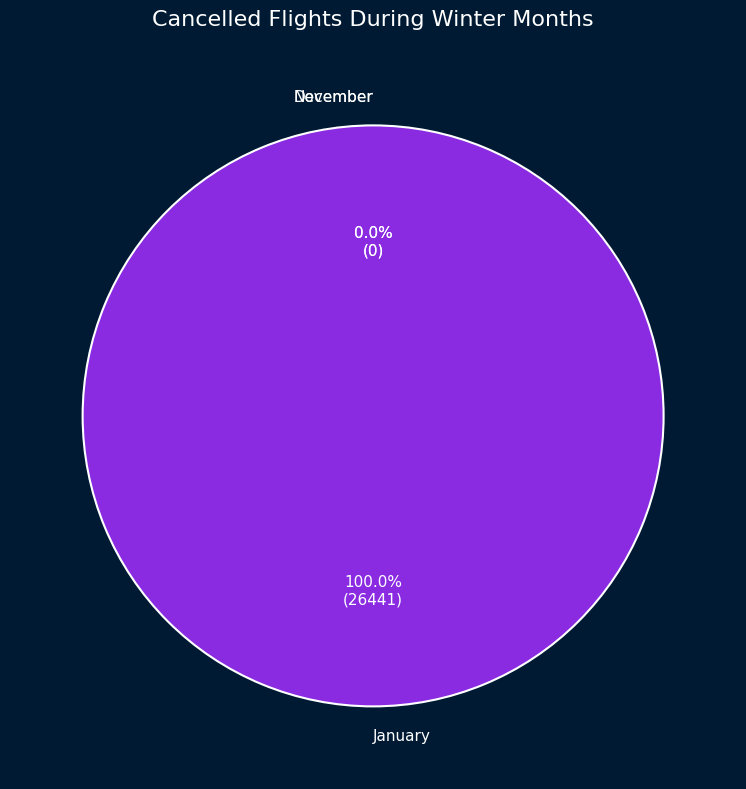

In [ ]:


winter_months = [11, 12, 1]
month_names = {1: 'January', 11: 'November', 12: 'December'}

# Filter cancelled flights for winter
winter_cancelled = df[(df['Cancelled'] == 1) & (df['Month'].isin(winter_months))]

# Count cancellations per month and ensure all 3 months are present
cancelled_counts = winter_cancelled['Month'].value_counts().sort_index()
cancelled_counts = cancelled_counts.reindex(winter_months, fill_value=0)


labels = [month_names[m] for m in cancelled_counts.index]
colors = ['#00BFFF', '#7B68EE', '#8A2BE2']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    cancelled_counts,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(cancelled_counts) / 100)})',
    colors=colors,
    startangle=90,
    textprops={'color': 'white', 'fontsize': 11},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title('Cancelled Flights During Winter Months', fontsize=16, color='white', pad=20)
plt.gcf().patch.set_facecolor('#001a33')
plt.tight_layout()
plt.show()


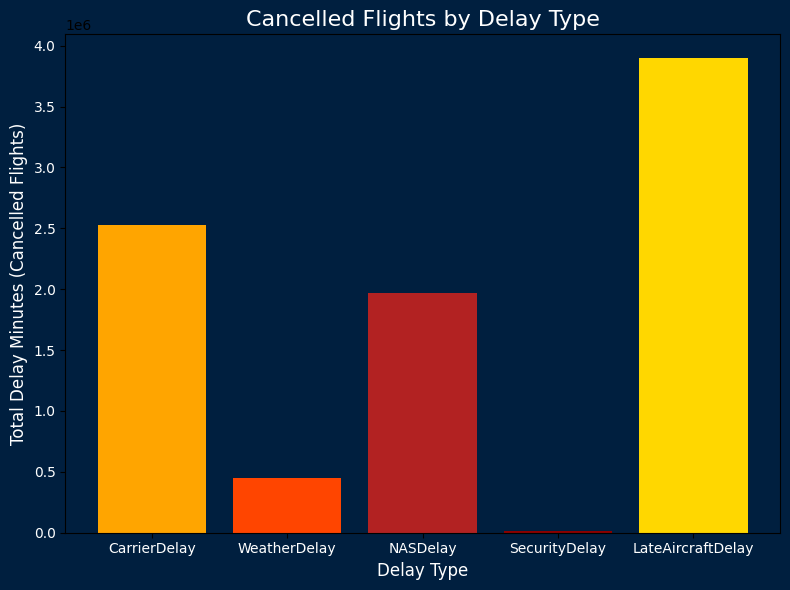

In [33]:
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
cancelled_by_delay = {}

for delay in delay_types:
    if delay in df.columns:
        cancelled_by_delay[delay] = df[df['Cancelled'] == 1][delay].sum()

plt.figure(figsize=(8,6))
plt.bar(cancelled_by_delay.keys(), cancelled_by_delay.values(), color=['#FFA500', '#FF4500', '#B22222', '#8B0000', '#FFD700'])
plt.title('Cancelled Flights by Delay Type', fontsize=16, color='white')
plt.xlabel('Delay Type', fontsize=12, color='white')
plt.ylabel('Total Delay Minutes (Cancelled Flights)', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#001f3f')
plt.gcf().patch.set_facecolor('#001f3f')
plt.tight_layout()
display(plt.gcf())
plt.close()

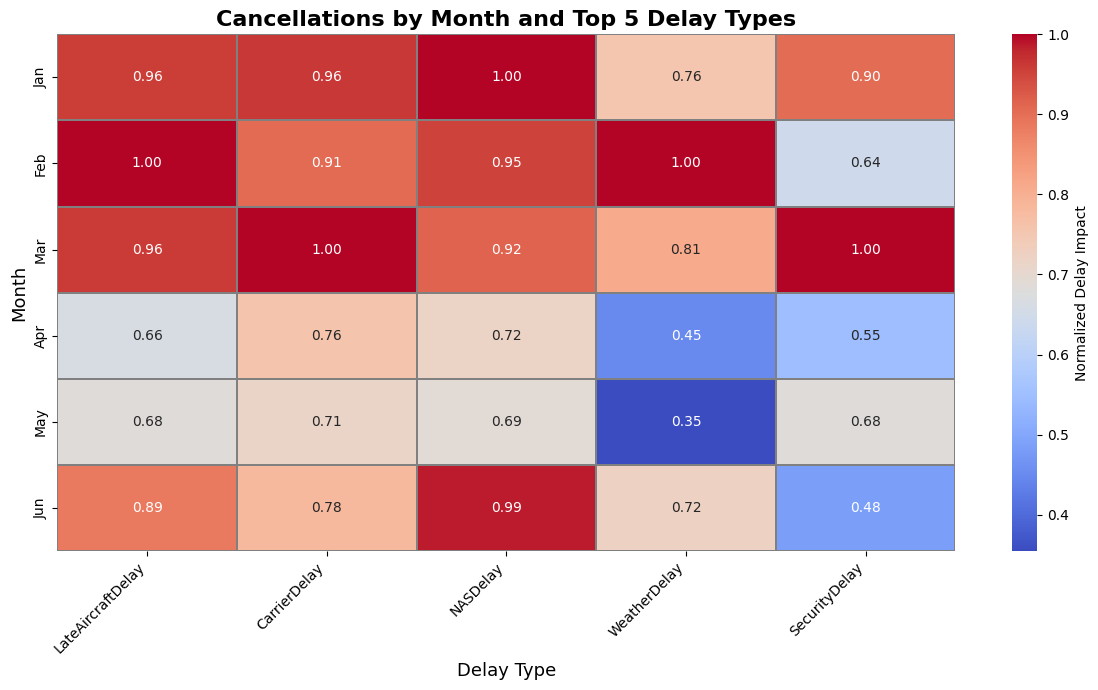

In [ ]:

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

cancelled_delays = (
    df[df['Cancelled'] == 1][delay_types]
    .sum()
    .sort_values(ascending=False)
)
top5_delays = cancelled_delays.head(5).index.tolist()

heatmap_data = (
    df[df['Cancelled'] == 1]
    .groupby('Month')[top5_delays]
    .sum()
)

heatmap_norm = heatmap_data.div(heatmap_data.max())

month_labels = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
heatmap_norm.index = heatmap_norm.index.map(month_labels)


plt.figure(figsize=(12, 7))
sns.heatmap(
    heatmap_norm,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Normalized Delay Impact'},
    linewidths=0.3,
    linecolor='gray'
)

plt.title('Cancellations by Month and Top 5 Delay Types', fontsize=16, weight='bold')
plt.xlabel('Delay Type', fontsize=13)
plt.ylabel('Month', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


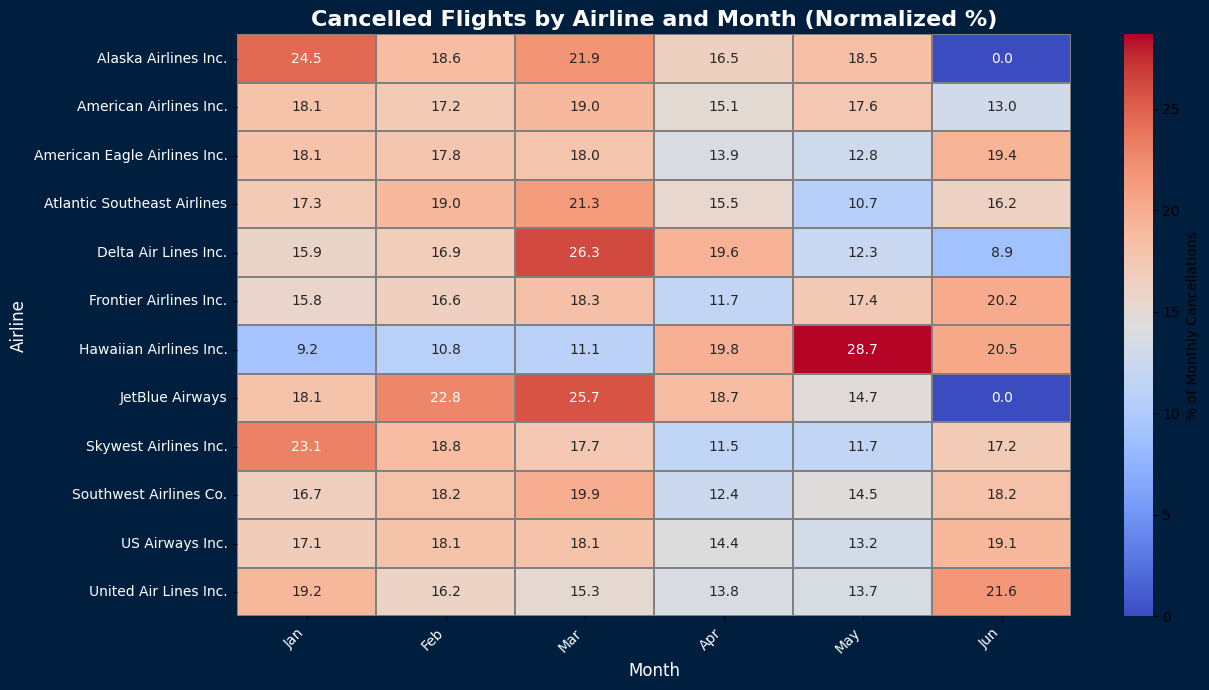

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


if {'Airline', 'Month', 'Cancelled'}.issubset(df.columns):
   
    cancellations_airline_month = (
        df[df['Cancelled'] == 1]
        .groupby(['Airline', 'Month'])
        .size()
        .unstack(fill_value=0)
    )

    
    cancellations_norm = cancellations_airline_month.div(cancellations_airline_month.sum(axis=1), axis=0) * 100

    
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    cancellations_norm.columns = month_labels[:len(cancellations_norm.columns)]

    plt.figure(figsize=(13, 7))
    sns.heatmap(
        cancellations_norm,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",
        linewidths=0.3,
        linecolor='gray',
        cbar_kws={'label': '% of Monthly Cancellations'}
    )

    plt.title('Cancelled Flights by Airline and Month (Normalized %)', fontsize=16, weight='bold', color='white')
    plt.xlabel('Month', fontsize=12, color='white')
    plt.ylabel('Airline', fontsize=12, color='white')
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')

    plt.gca().set_facecolor('#001f3f')
    plt.gcf().patch.set_facecolor('#001f3f')

    plt.tight_layout()
    display(plt.gcf())
    plt.close()
